In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks/"

 accent-mfcc-data-1.csv
 Arvore-Thresholds.ipynb
'Classificador de Arvores1.ipynb'
'Classificador de Arvores2.ipynb'
'Classificador de Arvores3.ipynb'
'Classificador de Arvores4.ipynb'
'Classificador de Arvores5.ipynb'
'Classificador de Arvores6.ipynb'
'Classificador de Arvores7.ipynb'
'Classificador de Arvores8.ipynb'
'Classificador de Arvores9.ipynb'
'Classificador de Arvores9_semdeep.ipynb'
'Cópia de Classificador Arvores FastAI.ipynb'
'Cópia de Classificador de Arvores7.ipynb'
 dataset_folhas
 HOG_SVM_Folhas1.ipynb
 Iris_Classifica.ipynb
 iris_csv.csv
 OpenCV1.ipynb
 Puxa_dataset_UCI.ipynb
 Puxando_dataset_gdrive.ipynb
 Speech_Recognition.ipynb
 TCC_Reconhecedor_de_idioma.ipynb
 Untitled0.ipynb
 US-M-5-9.wav
 Usodegit.ipynb


In [ ]:
import pandas as pd
pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/accent-mfcc-data-1.csv')

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/accent-mfcc-data-1.csv')

In [ ]:
data.language.value_counts()

US    165
UK     45
GE     30
IT     30
FR     30
ES     29
Name: language, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb_make = LabelEncoder()
data['language'] = lb_make.fit_transform(data['language'])

In [ ]:
data.head(329)

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,0,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,0,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,0,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,0,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,5,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,5,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,5,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,5,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
data.shape

(329, 13)

In [ ]:
data.info

<bound method DataFrame.info of      language         X1        X2  ...        X10       X11       X12
0           0   7.071476 -6.512900  ...  -2.812753  0.866538 -5.244274
1           0  10.982967 -5.157445  ...  -4.508811  2.332147 -6.221857
2           0   7.827108 -5.477472  ...  -7.204041 -0.011847 -6.463144
3           0   6.744083 -5.688920  ...  -6.019237  1.358559 -6.356441
4           0   5.836843 -5.326557  ...  -3.644812  2.151239 -6.816310
..        ...        ...       ...  ...        ...       ...       ...
324         5  -0.525273 -3.868338  ...   7.129909  0.209947 -1.946914
325         5  -2.094001 -1.073113  ...   6.728373  2.461446 -0.026113
326         5   2.116909 -4.441482  ...   7.566142 -0.606010 -2.245129
327         5   0.299616  0.324844  ...   4.664406  1.197789 -2.230275
328         5   3.214254 -3.135152  ...  10.605734  0.349482 -5.983281

[329 rows x 13 columns]>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3a6bf6210>,
      dtype=object)

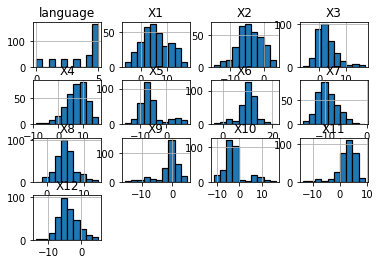

In [ ]:
data.hist(edgecolor='black', linewidth=1.2)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics #for checking the model accugracy

In [ ]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(230, 13)
(99, 13)


In [ ]:
data.head(0)

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12


In [ ]:
train_X = train[['X1',	'X2',	'X3',	'X4',	'X5',	'X6',	'X7',	'X8',	'X9',	'X10',	'X11',	'X12']]# taking the training data features
train_y=train.pop('language') # output of our training data
test_X= test[['X1',	'X2',	'X3',	'X4',	'X5',	'X6',	'X7',	'X8',	'X9',	'X10',	'X11',	'X12']] # taking test data features
test_y =test.pop('language')  #output value of test data

In [ ]:
# import necessary modules
from sklearn import preprocessing
print(preprocessing.normalize(train_X))
print(preprocessing.normalize(test_X))

[[ 0.34666211 -0.25214357 -0.084842   ... -0.09660814  0.15619932
  -0.10964423]
 [ 0.19719913 -0.11920812  0.04758071 ... -0.1466085   0.27325523
  -0.10877439]
 [ 0.44561708 -0.29865264  0.01476157 ... -0.16639714  0.23390467
  -0.07187187]
 ...
 [ 0.44962412 -0.22365056  0.11772252 ... -0.08411551  0.02331019
  -0.1165764 ]
 [ 0.04549683  0.03958428  0.0201697  ... -0.11308227  0.05476087
  -0.25040305]
 [ 0.27178927 -0.25032063  0.29405536 ... -0.108107    0.03330502
  -0.20156152]]
[[ 0.15145732 -0.28433146  0.24656807 ... -0.11280124  0.13030882
  -0.32346884]
 [ 0.49029948 -0.22011962  0.07873423 ... -0.15303233  0.18846146
  -0.33950775]
 [ 0.38863372 -0.15009221  0.32834934 ...  0.51873717 -0.4387428
   0.1170963 ]
 ...
 [ 0.47692311 -0.29730758  0.19044513 ... -0.10132578  0.10713389
  -0.44252823]
 [ 0.33392198 -0.26768502  0.05007746 ... -0.26619409  0.09223398
  -0.23799986]
 [ 0.11602793  0.16365188  0.0051936  ... -0.24918329  0.17740369
  -0.25011108]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3a5658a90>,
      dtype=object)

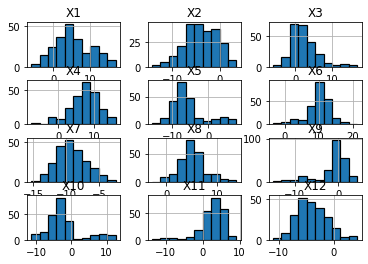

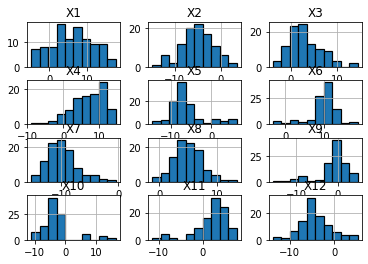

In [ ]:
train_X.hist(edgecolor='black', linewidth=1.2)
test_X.hist(edgecolor='black', linewidth=1.2)


In [ ]:
print(train_X)

            X1        X2        X3  ...       X10       X11       X12
308   7.883104 -5.733750 -1.929309  ... -2.196871  3.551976 -2.493312
193   4.552812 -2.752203  1.098514  ... -3.384806  6.308748 -2.511316
214  11.456458 -7.678120  0.379508  ... -4.277937  6.013502 -1.847768
9     9.803577 -4.485605  9.092753  ... -9.935106  2.556851 -5.887197
279   2.806915 -3.639327 -0.807013  ... -2.791867  6.749552 -2.507010
..         ...       ...       ...  ...       ...       ...       ...
211  12.707481 -8.669480  2.941209  ... -4.445257  0.153617 -5.380385
91    2.718099 -5.837986  3.822594  ... -3.803533 -0.682318 -2.361943
298  12.752537 -6.343325  3.338924  ... -2.385740  0.661139 -3.306417
125   0.900426  0.783411  0.399178  ... -2.238008  1.083771 -4.955720
0     7.071476 -6.512900  7.650800  ... -2.812753  0.866538 -5.244274

[230 rows x 12 columns]


In [ ]:
print(train_y)

308    5
193    5
214    5
9      0
279    5
      ..
211    5
91     3
298    5
125    4
0      0
Name: language, Length: 230, dtype: int64


In [ ]:
from sklearn.neural_network import MLPClassifier
classifier3=MLPClassifier(hidden_layer_sizes=(100,100,100))

In [ ]:
classifier3.fit(train_X,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

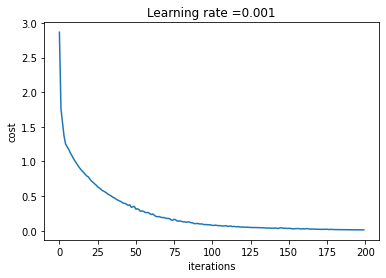

In [ ]:
import matplotlib.pyplot as plt
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(classifier3.loss_curve_)
plt.show()



In [ ]:
predictions3=classifier3.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,predictions3))

0.8080808080808081


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_y,predictions3)
print(cm)

[[10  0  0  0  1  4]
 [ 0  4  0  0  0  2]
 [ 0  0  7  0  0  3]
 [ 0  1  2  5  0  0]
 [ 0  0  0  1 11  2]
 [ 0  1  1  0  1 43]]


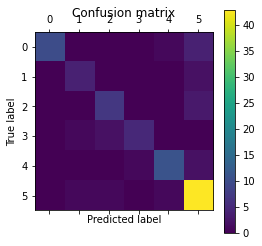

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()